In [133]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

### TASK 1: Merging 12 months of sales data into a single file

In [91]:
files = [file for file in os.listdir('./Sales_Data/')]
merging_data = pd.DataFrame()

for idx, file in enumerate(files):
    df = pd.read_csv(f"./Sales_Data/{file}")
    merging_data = pd.concat([df, merging_data])

merging_data.to_csv('merging_months.csv', index=False)

#### Read updated file

In [92]:
df = pd.read_csv('merging_months.csv', dtype='unicode')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


#### Cleanup the data

#####  Drop rows of NAN

In [93]:
df = df.dropna(how='all')

##### Check nan values presence

In [94]:
nan_df_check = df[df.isna().any(axis=1)]
nan_df_check.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### Drop rows with header duplicates

In [98]:
df = df[df['Order Date'] != 'Order Date']

##### Convert 'Order Date' and 'Price Each' columns to correct type

In [129]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = df['Price Each'].astype('float')

### Augment data with addiotional columns

### TASK 2: Add month columns

In [130]:
df['Month'] = df['Order Date'].str[0:2].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


### TASK 3: Add a sales column

In [131]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


### Question 1: What was the best month for sales? How much was earned that month?

In [135]:
sales = df.groupby(['Month']).agg({'Sales': ['sum']})
sales

,Sales
,sum
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88


In [ ]:
sales[sales[('Sales', 'sum')] ==  sales[('Sales', 'sum')].max()]

<AxesSubplot:xlabel='Month number', ylabel='Sales in USD ($)'>

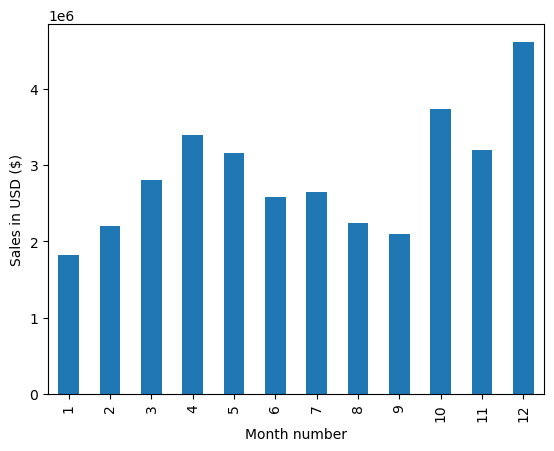

In [141]:
sales.plot(kind='bar', ylabel='Sales in USD ($)', xlabel='Month number', legend=False)